In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("C:/Users/DELL/Downloads/Python Portfolio/CustomerCsv.xlsx")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


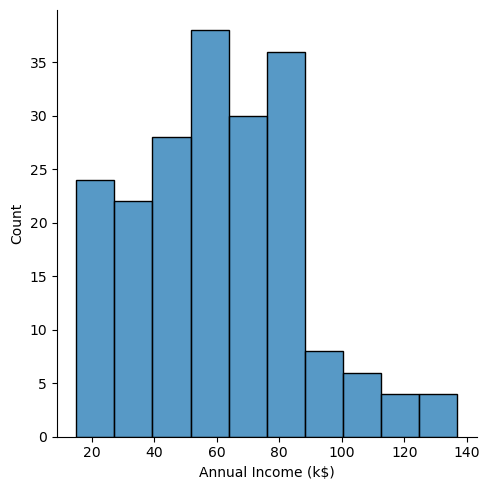

In [5]:
sns.displot(data['Annual Income (k$)'])

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

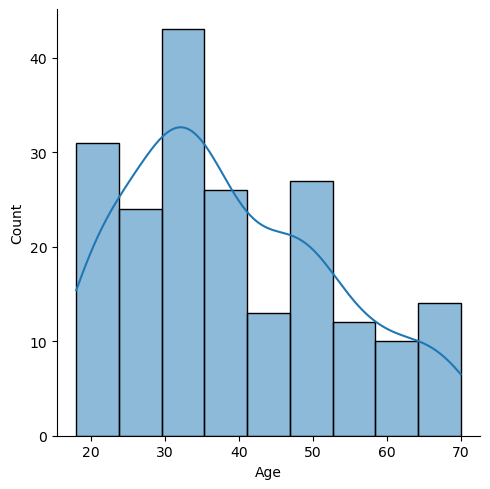

<Figure size 640x480 with 0 Axes>

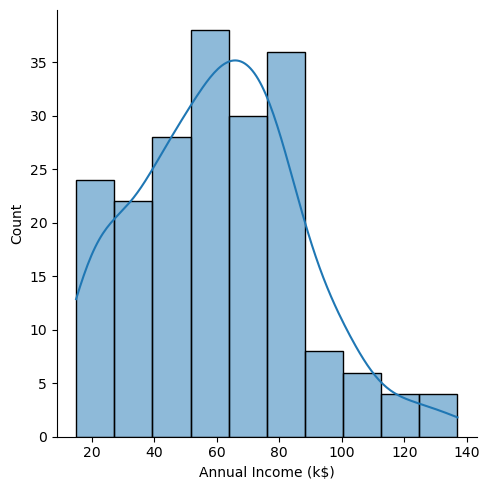

<Figure size 640x480 with 0 Axes>

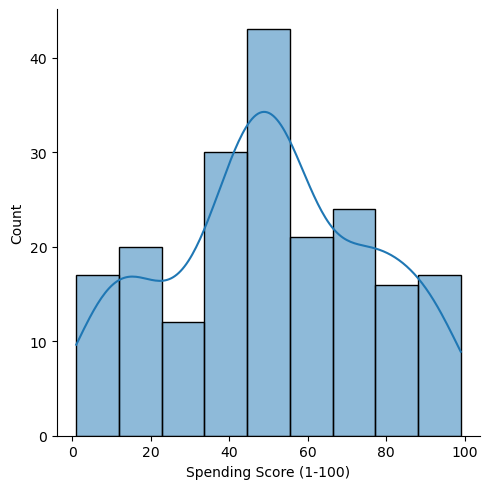

In [7]:
#Checking the distribution of the data
cols = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure()
    sns.displot(data[i],kde=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

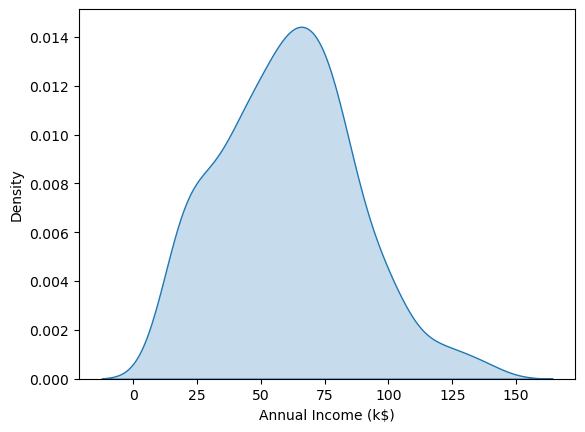

In [8]:
sns.kdeplot(data['Annual Income (k$)'],shade=True)

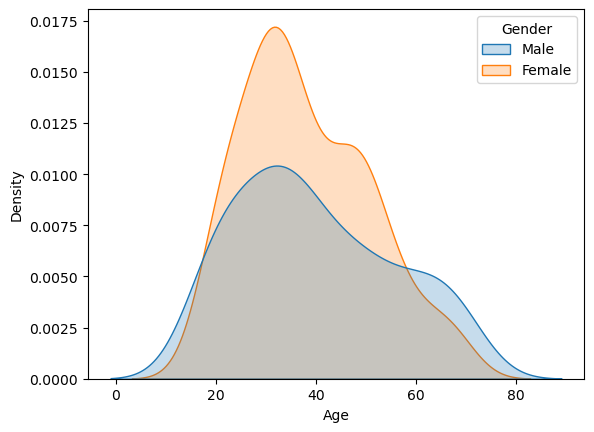

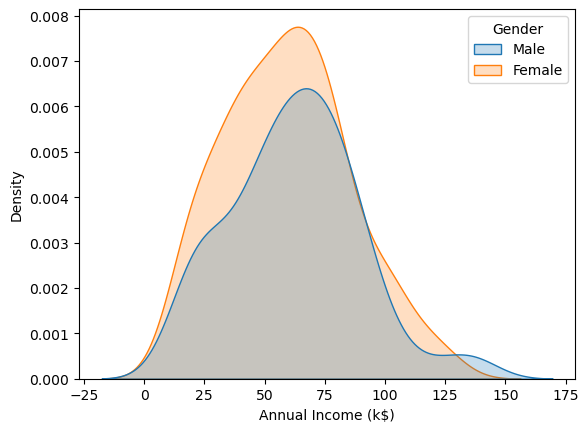

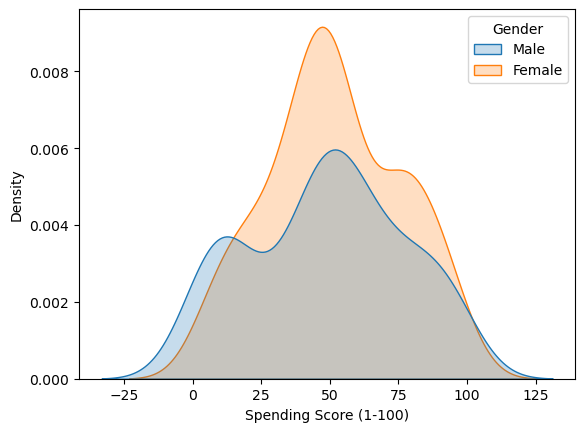

In [9]:
cols = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure()
    sns.kdeplot(data[i],shade=True,hue=data['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

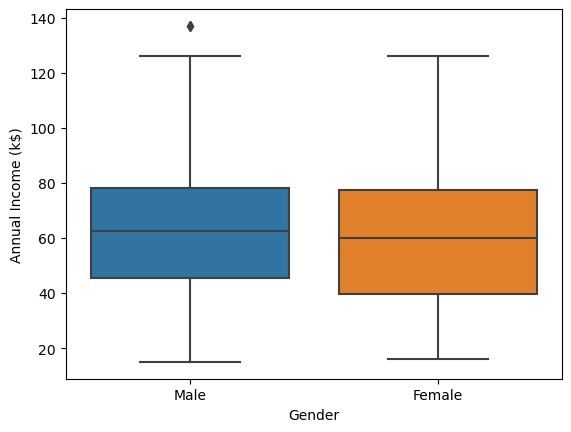

In [10]:
sns.boxplot(data=data,x='Gender',y='Annual Income (k$)')

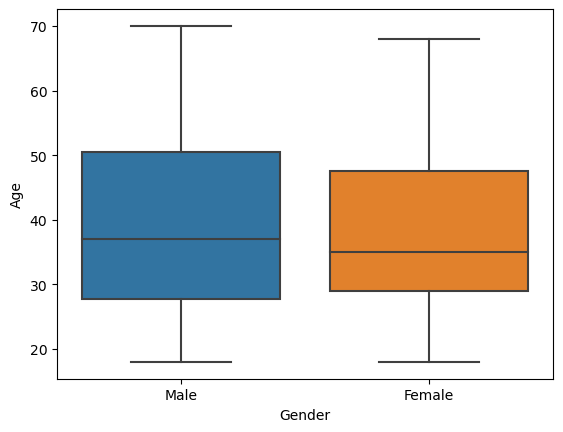

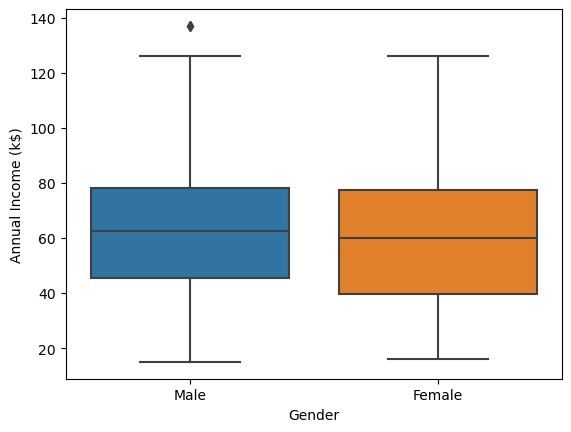

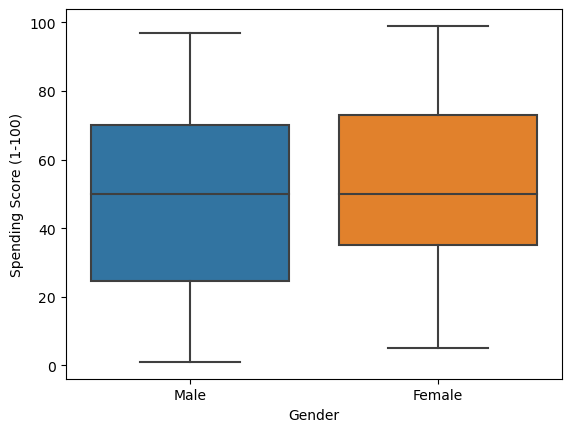

In [11]:
cols = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure()
    sns.boxplot(data=data,x='Gender',y=data[i])

In [12]:
#To know the distribution of the Gender
print(data['Gender'].value_counts())
print('Percentage of the Gender Distribution',data['Gender'].value_counts(normalize=True))

Female    112
Male       88
Name: Gender, dtype: int64
Percentage of the Gender Distribution Female    0.56
Male      0.44
Name: Gender, dtype: float64


# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

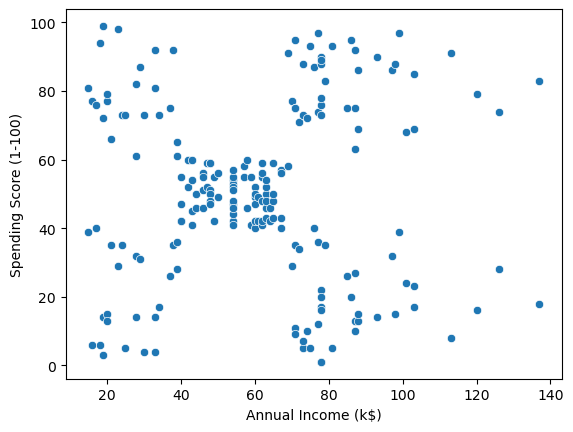

In [13]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)')

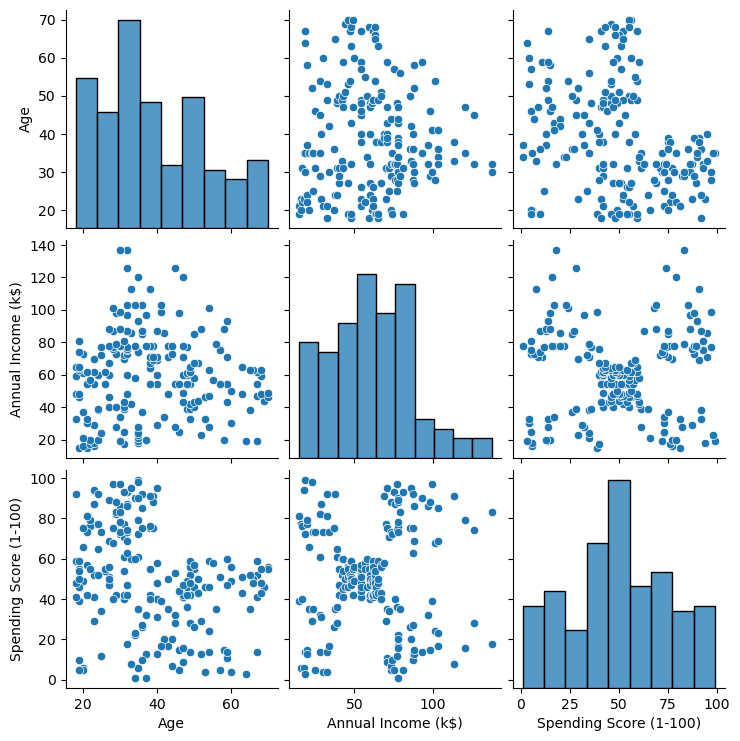

In [14]:
#do a pairplot excluding the Customer ID
sns.pairplot(data[cols])

In [15]:
data.groupby('Gender')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
data_no_id = data.drop('CustomerID',axis=1)

In [17]:
data_no_id.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

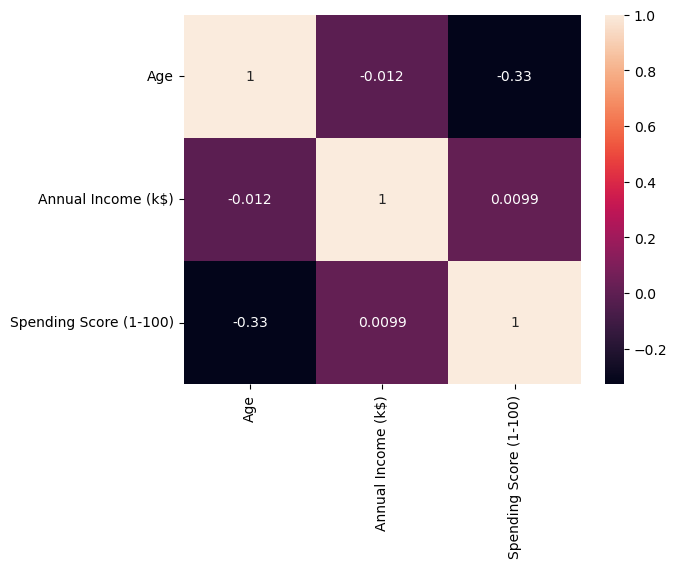

In [18]:
#present in an heatmap
sns.heatmap(data_no_id.corr(),annot=True)

# Clustering

In [43]:
data_dummies = pd.get_dummies(data,drop_first=True)

In [44]:
data_dummies

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Discovered Cluster,Gender_Male
0,1,19,15,39,3,1
1,2,21,15,81,1,1
2,3,20,16,6,3,0
3,4,23,16,77,1,0
4,5,31,17,40,3,0
...,...,...,...,...,...,...
195,196,35,120,79,0,0
196,197,45,126,28,2,0
197,198,32,126,74,0,1
198,199,32,137,18,2,1


In [48]:
scale = StandardScaler()

In [49]:
x = data_dummies[['Age', 'Annual Income (k$)','Spending Score (1-100)','Gender_Male']]

In [50]:
scale.fit(x)

StandardScaler()

In [52]:
scale.transform(x)

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [53]:
# Elbow method to discover the number of cluster for a Multiivariate data

WCSS = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    WCSS_Cal = kmeans.inertia_
    WCSS.append(WCSS_Cal)

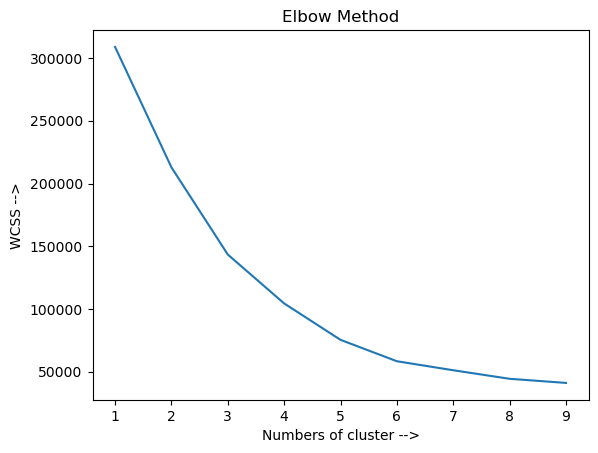

In [54]:
#plot to see the numbers of cluster recommended

plt.plot(range(1,10),WCSS)
plt.title('Elbow Method')
plt.xlabel('Numbers of cluster -->')
plt.ylabel('WCSS -->');

In [55]:
# Since 6 Cluster was recommended, we use 6 Cluster and Cluster_centers to it
kmeans = KMeans(6)

In [56]:
kmeans.fit(x)

KMeans(n_clusters=6)

In [57]:
kmeans.labels_

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 0, 3,
       4, 5, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [58]:
clusters = kmeans.fit_predict(x)

In [59]:
data['Discovered Cluster'] = clusters

In [60]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Discovered Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,3
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3


# Analyzing with the Clusters

In [61]:
data.groupby(['Discovered Cluster','Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

Age  Annual Income (k$)  \
Discovered Cluster Gender                                  
0                  Female  41.538462           26.538462   
                   Male    48.375000           22.875000   
1                  Female  54.080000           53.240000   
                   Male    58.750000           53.550000   
2                  Female  25.461538           25.692308   
                   Male    25.000000           25.777778   
3                  Female  44.600000           92.333333   
                   Male    39.500000           85.150000   
4                  Female  32.190476           86.047619   
                   Male    33.277778           87.111111   
5                  Female  27.960000           57.360000   
                   Male    25.153846           55.307692   

                           Spending Score (1-100)  
Discovered Cluster Gender                          
0                  Female               20.692308  
                   Male                 17.625000  
1                  Female               49.520000  
                   Male                 48.550000  
2                  Female               80.538462  
                   Male                 77.666667  
3                  Female               21.600000  
                   Male                 14.050000  
4                  Female               81.666667  
                   Male                 82.666667  
5                  Female               47.120000  
                   Male                 53.000000

In [62]:
#To see the distribution of the Cluster Each
data['Discovered Cluster'].value_counts()

1    45
4    39
5    38
3    35
2    22
0    21
Name: Discovered Cluster, dtype: int64

# Plot the clusters

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

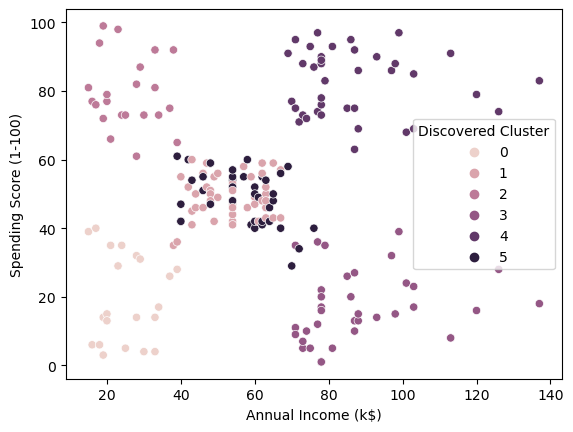

In [63]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=data['Discovered Cluster'],hue=data['Discovered Cluster'])

In [64]:
# Add Cluster Centers
kmeans.cluster_centers_

array([[44.14285714, 25.14285714, 19.52380952,  0.38095238],
       [56.15555556, 53.37777778, 49.08888889,  0.44444444],
       [25.27272727, 25.72727273, 79.36363636,  0.40909091],
       [41.68571429, 88.22857143, 17.28571429,  0.57142857],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [27.        , 56.65789474, 49.13157895,  0.34210526]])

In [65]:
cluster_df =pd.DataFrame(kmeans.cluster_centers_)
cluster_df.columns = ['W','X','Y','Z']

In [66]:
cluster_df

,W,X,Y,Z
0,44.142857,25.142857,19.523810,0.380952
1,56.155556,53.377778,49.088889,0.444444
2,25.272727,25.727273,79.363636,0.409091
3,41.685714,88.228571,17.285714,0.571429
4,32.692308,86.538462,82.128205,0.461538
5,27.000000,56.657895,49.131579,0.342105


# Customer Segmentation with the cluster centers

<AxesSubplot:xlabel='X', ylabel='Y'>

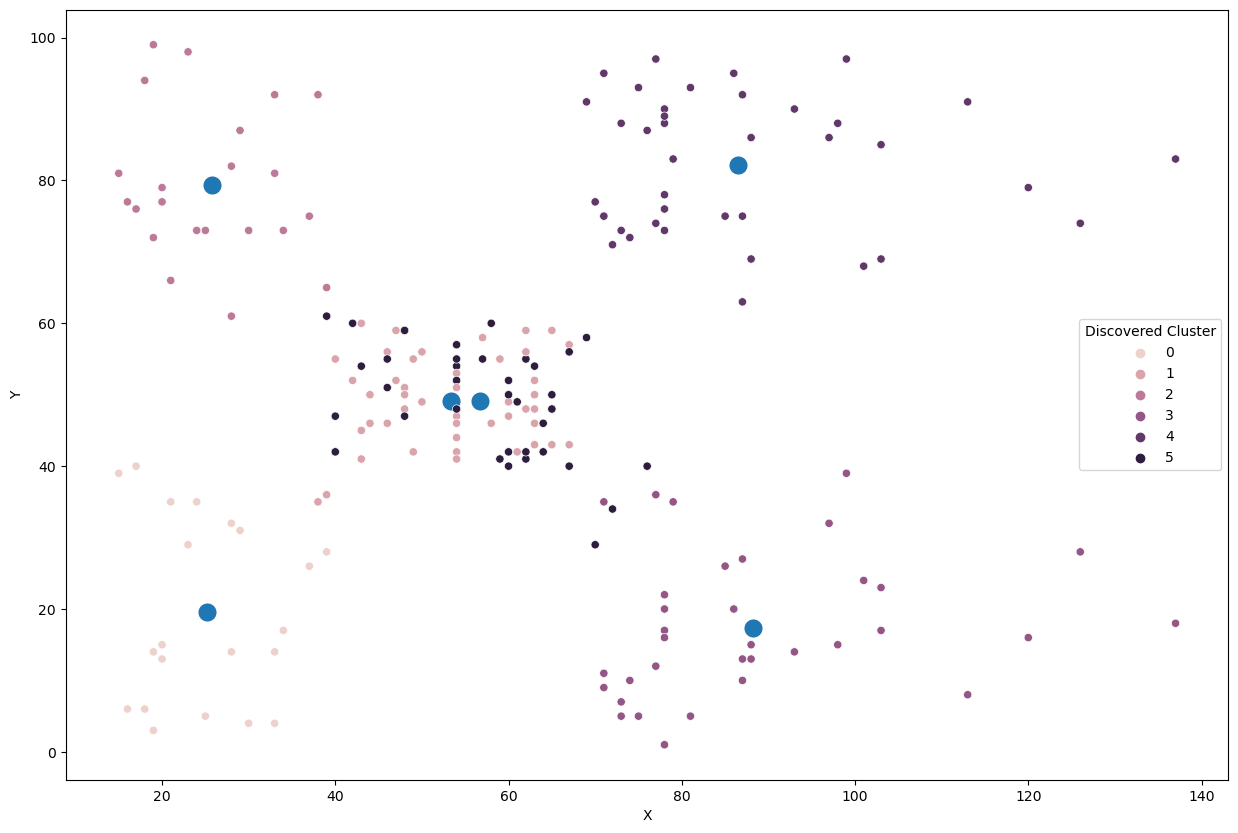

In [67]:

plt.figure(figsize=(15,10))

sns.scatterplot(cluster_df['X'],cluster_df['Y'],markers='+',s=200)
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=data['Discovered Cluster'],hue=data['Discovered Cluster'])